# Neural Networks: There and Back Again...and Again...and Again

We talked last week about how Support Vector Machines were supposed to revolutionize machine learning when they first came out, but are hardly talked about anymore. The algorithm that is actually revolutionizing machine learning is the neural network. The nice thing about Support Vector Machines is that they can be used to create nonlinear classification boundaries. They do this by transforming the input data to a space where the boundary is linear and then untransforming the predicted boundary. Thus, it automates feature engineering for you. Neural Nets also do this, but in a much more straight forward way:

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg">
Taken from the MIT CS231n <a href="http://cs231n.github.io/neural-networks-1/">course page</a>. <a href="https://github.com/cs231n/cs231n.github.io/blob/master/LICENSE">LICENSE</a>.

Each circle in the diagram is called a neuron or node. Each feature in your input data gets a node. Each class in your output gets a node. In the above picture, there are two outputs, so it's a binary classification problem. To get from the input to the output you go through any number of hidden layers with any number of nodes; the numbers are hyperparameters. You can see that all the input nodes contribute to each hidden layer node somehow. The weights for how much each input contributes are the parameters to be optimized. It's called a hidden layer because the user doesn't get to see the parameters without purposefully looking for them. Thus, feature engineering is automated.

Neural nets are mainly used for classification, so that's the problem I'm going to focus on. I'll explain how it can be modified later.

## Matrix Multiplication: A Review

When trying to figure out how to code an algorithm, it is helpful to keep track of all the dimensions of the matrices and vectors you're working with. Remember what happens with the dimensions:
$$ [n \times m][m \times p] = [n \times p] $$
The inner two dimensions have to be the same; the operation is not defined otherwise. The product matrix then takes the outer dimensions. For example, take these two vectors (1D matrices):
$$ \mathbf{A} =  \begin{bmatrix}
                    a_1 \newline a_2 \newline a_3
                 \end{bmatrix},
\mathbf{B} = \begin{bmatrix}
                b_1 \newline b_2 \newline b_3
             \end{bmatrix} $$
They are both $[3 \times 1]$ vectors. They can't be multiplied together as is, but if you take the transpose of one, they can be. This gives us two possibilities:
$$ \mathbf{A^TB} = a_1b_1 + a_2b_2 + a_3b_3 \\
   \mathbf{AB^T} = \begin{bmatrix}
                        a_1b_1 & a_1b_2 & a_1b_3 \\
                        a_2b_1 & a_2b_2 & a_2b_3 \\
                        a_3b_1 & a_3b_2 & a_3b_3
                   \end{bmatrix} \\ $$
Notice that the answers are quite different.

This is what the above looks like as a summation:
$$ (\mathbf{AB})_{ij} = \sum_{k=1}^m A_{ik}B_{kj} $$
where $i$ goes from 1 to $n$ and $j$ goes from 1 to $p$.

## Binary Logistic Regression: A Review

First, let's review the math behind binary logistic regression. I'll be using the notation from <a href="https://www.coursera.org/learn/machine-learning/home/welcome">Machine Learning by Andrew Ng</a> on Coursera, except for one change. I'm going to treat the parameter and feature vectors as row vectors, while Andrew Ng treats them as column vectors.

So, we have a binary classification problem with classes 0 and 1. You have a hypothesis about your data, $ h_{\theta}(x) $, which is the probability that the item with feature $x$ is in class 1. The probability of class 0 is $1 - h_{\theta}(x) $. What does this hypothesis look like? We need a function that can take any real number and squish it into the interval [0,1]. This is called the activation function. One such function is the sigmoid, or logistic, function:
$$ g(z) = \frac {1}{1+e^{-z}} $$
<img src="http://cs231n.github.io/assets/nn1/sigmoid.jpeg">
Taken from the MIT CS231n <a href="http://cs231n.github.io/neural-networks-1/">course page</a>. <a href="https://github.com/cs231n/cs231n.github.io/blob/master/LICENSE">LICENSE</a>.

When $ h_{\theta}(x) = g(z) \geq 0.5$, we predict class 1. When $ h_{\theta}(x) = g(z) < 0.5$, we predict class 0. Well, what is $z$? If we have $n$ features:
$$ z = \theta_0 + \theta_1x_1 + ... + \theta_nx_n = \begin{bmatrix}1(=x_0) &  x_1 &  ...  \hspace{2em}  x_n\end{bmatrix}\begin{bmatrix} \theta_0 \newline \theta_1 \newline \vdots \newline \theta_n\end{bmatrix}= \boldsymbol{x \theta}^T $$
where $\theta$ and $x$ are column vectors. $\theta$ are the parameters to optimize. $\theta_0$ is called the bias term and it acts much like an intercept term in linear regression. Just like $b$ allows you to shift a line along the y axis, $\theta_0$ allows the activation function to shift to get a better fit.

The cost function for this problem is:
$$ J(\boldsymbol{\theta}) = - \frac{1}{m} \displaystyle \sum_{i=1}^m [y^{(i)}\log (h_\theta (\mathbf{x}^{(i)})) + (1 - y^{(i)})\log (1 - h_\theta(\mathbf{x}^{(i)}))] $$
where $m$ is the number of observations. Basically, if you think about a DataFrame, $i$ is the row and $m$ is the total number of rows. Then $\mathbf{x}$ is $[m \times n]$ (without the added bias variable) and $\mathbf{y}$ is $[m \times 1]$. In vectorized notation, this is:
$$ J(\boldsymbol{\theta}) = - \frac{1}{m} [\mathbf{y}^T \log (g(\boldsymbol{x \theta}^T)) + (\mathbf{1 - y}^T) \log (g(1 - \boldsymbol{x \theta}^T))] $$

You can also add a regularization term:
$$ J(\boldsymbol{\theta}) = - \frac{1}{m} \displaystyle \sum_{i=1}^m [y^{(i)}\log (h_\theta (\mathbf{x}^{(i)})) + (1 - y^{(i)})\log (1 - h_\theta(\mathbf{x}^{(i)}))] + \frac{\lambda}{2m} \sum^{n}_{j=1} \theta_j$$
**Note:** The bias term is not included!!!  

And in vector notation:
$$ J(\boldsymbol{\theta}) = - \frac{1}{m} [\mathbf{y}^T \log (g(\boldsymbol{x \theta}^T)) + (\mathbf{1 - y}^T) \log (g(1 - \boldsymbol{x \theta}^T))] + \frac{\lambda}{2m}\boldsymbol\theta_{j \neq 0}\boldsymbol\theta_{j \neq 0}^T$$

Then you can minimize the cost function with the solver of your choice. Often times, the solver asks for a cost function and a derivative, so here's the derivative:
$$ \frac{\partial}{\partial\boldsymbol{\theta}} J(\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^m  (h_\theta(\mathbf{x}^{(i)}) - y^{(i)}) \mathbf{x}_j^{(i)} \\
= \frac{1}{m} \mathbf{x}^T(g(\boldsymbol{x \theta}^T - \mathbf{y}))
$$
Note that there are $n+1$ derivatives, one for each feature and one for the bias term. To add regularization to this, add $ \frac {\lambda}{m}\theta_j $ to the jth derivative, except for the bias term. Don't add anything to the bias term. There's really not a good way to notate this.

The easiest solver to use is gradient descent and it's exactly what it sounds like. If you imagine a graph of the cost function vs the parameters, the minimum is the bottom of the valley in the graph. You have to descend the slope, or gradient, to get there.

<img src="https://upload.wikimedia.org/wikipedia/commons/5/5b/Gradient_descent_method.png">
By Роман Сузи (Сгенерирован программой, повернут вручную) [GFDL (http://www.gnu.org/copyleft/fdl.html) or CC BY-SA 3.0 (http://creativecommons.org/licenses/by-sa/3.0)], via Wikimedia Commons

To implement the algorithm, the estimates for $\boldsymbol\theta$ are updated according to their gradients, the cost function is recalculated, and this is repeated until convergence. Here are the equations for updating $\boldsymbol\theta$:
$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\boldsymbol\theta) $$
$\alpha$ is called the learning rate, and it's a hyperparameter that determines how fast the algorithm converges. If it is too large, the algorithm could keep missing the minimum and never converge. If it's too small, the algorithm could take a long time to converge.

## Breakfast: Neural Nets from scratch
Neural nets just apply logistic regression at every neuron past the input layer. To keep things simple, I'm going to stick with a binary classification problem modified from <a href="http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/">this</a> blog post. So, let's use scikit learn's <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">```make_moons()```</a> function to get some binary data.

In [1]:
%matplotlib inline

In [2]:
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Generate a dataset
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)

In [4]:
m, n = X.shape
X.shape

(200, 2)

So we have 200 observations and 2 features.

In [5]:
y.shape

(200,)

Note that numpy doesn't distinguish between row and column vectors by default. Everything is just a 1D array. This could get confusing when delving into the math, so let's turn it into a column vector.

In [6]:
y = np.reshape(y, (200,1))
y.shape

(200, 1)

In [7]:
# here's what it might look like in a DataFrame
data = np.column_stack((X, y))
data = pd.DataFrame(data, columns=["Height", "Daily Caloric Intake", "Hobbit?"])
data["Hobbit?"] = data["Hobbit?"].astype(int)
data.head()

,Height,Daily Caloric Intake,Hobbit?
0,0.743461,0.464656,0
1,1.657557,-0.632032,1
2,-0.158789,0.255845,1
3,-1.088752,-0.396943,0
4,1.768052,-0.254432,1


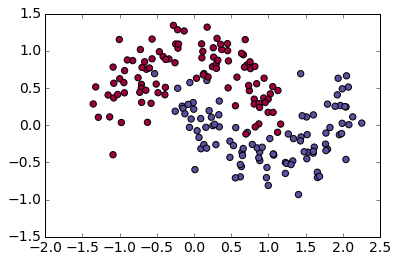

In [8]:
#plot it
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

From the graph, it's easy to see that the division between hobbits and not hobbits is not linear, so logistic regression by itself won't work without some feature engineering. That's why we throw it into a neural net and let it do the engineering for us.

### Forward propagation
First, we start with our inputs and calculate forward to the output neurons using initial guesses for all $\boldsymbol\theta$'s. In our example, we'll have one hidden layer with 5 neurons. 
<img src="nn-from-scratch-3-layer-network.png">

For clarity's sake, the bias terms are not usually included in these types of diagrams. The $\mathbf a$'s are the activation units. $\mathbf a^{(1)}$ is just $\mathbf X$, plus a column of one's for the bias variable. Input 1 is "Height" and Input 2 is "Daily Caloric Intake." In a single logistic regression, $\boldsymbol\theta^{(1)}$ would be $[1 \times 3]$. But, we're doing 5 logistic regressions, one for each neuron in the hidden layer, so $\boldsymbol\theta^{(1)}$ is $[5 \times 3]$.

In [9]:
n_hl_nodes = 5
np.random.seed(37)
theta1 = np.random.randn(n_hl_nodes, n+1)

In [10]:
theta1

array([[-0.05446361,  0.67430807,  0.34664703],
       [-1.30034617,  1.51851188,  0.98982371],
       [ 0.2776809 , -0.44858935,  0.96196624],
       [-0.82757864,  0.53465707,  1.22838619],
       [ 0.51959233, -0.06335482, -0.03479336]])

In [11]:
theta1.shape

(5, 3)

**Note:** When initializing $\boldsymbol\theta$, it is important to break symmetry. If $\boldsymbol\theta$ is symmetric, then some of the nodes in the hidden layer will turn out to be the same and the algorithm will not be as efficient.

Now, $\mathbf a^{(2)}$ is just $g(\boldsymbol{x \theta}^T)$ (with bias).

In [12]:
# define our activation function
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [13]:
# add bias to X
a1 = np.column_stack((np.ones_like(y), X))

In [14]:
a1[:5]

array([[ 1.        ,  0.74346118,  0.46465633],
       [ 1.        ,  1.65755662, -0.63203157],
       [ 1.        , -0.15878875,  0.25584465],
       [ 1.        , -1.088752  , -0.39694315],
       [ 1.        ,  1.768052  , -0.25443213]])

In [15]:
a1.shape #added a column, check!

(200, 3)

In [16]:
z1 = np.dot(a1, theta1.T)
a2 = sigmoid(z1)

In [17]:
a2[:5]

array([[ 0.64746846,  0.57163776,  0.59656091,  0.53511598,  0.61214165],
       [ 0.69933818,  0.6436114 ,  0.25466698,  0.32789236,  0.6074411 ],
       [ 0.48179596,  0.21615295,  0.64451745,  0.35475558,  0.62732328],
       [ 0.28369283,  0.03400889,  0.59489474,  0.13041583,  0.64620085],
       [ 0.74068847,  0.75632187,  0.31860208,  0.45144895,  0.60262873]])

In [18]:
a2.shape #shape is (m, n_hl_nodes), check!

(200, 5)

Essentially, we've turned our 2 feature problem into a 5 feature problem now. The next step is to use $\mathbf a^{(2)}$ like it's our new $\mathbf{X}$.

In [19]:
n_classes = 2
np.random.seed(42)
theta2 = np.random.randn(n_classes, n_hl_nodes+1)

In [20]:
theta2

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
        -0.23413696],
       [ 1.57921282,  0.76743473, -0.46947439,  0.54256004, -0.46341769,
        -0.46572975]])

In [21]:
theta2.shape

(2, 6)

In [22]:
# add bias to a2
a2 = np.column_stack((np.ones_like(y), a2))

In [23]:
a2[:5]

array([[ 1.        ,  0.64746846,  0.57163776,  0.59656091,  0.53511598,
         0.61214165],
       [ 1.        ,  0.69933818,  0.6436114 ,  0.25466698,  0.32789236,
         0.6074411 ],
       [ 1.        ,  0.48179596,  0.21615295,  0.64451745,  0.35475558,
         0.62732328],
       [ 1.        ,  0.28369283,  0.03400889,  0.59489474,  0.13041583,
         0.64620085],
       [ 1.        ,  0.74068847,  0.75632187,  0.31860208,  0.45144895,
         0.60262873]])

In [24]:
a2.shape #added a column, check!

(200, 6)

In [25]:
z2 = np.dot(a2, theta2.T)
a3 = sigmoid(z2)

In [26]:
a3.shape #shape is (m, n_classes), check!

(200, 2)

In [27]:
a3[:5]

array([[ 0.80492916,  0.83178466],
       [ 0.72824652,  0.82010629],
       [ 0.78947625,  0.85076425],
       [ 0.76918631,  0.85098359],
       [ 0.75447047,  0.81390075]])

$\mathbf a^{(3)}$ is $ h_{\theta}(x)$. You might also realize it's not the same size as $y$. What we need to do is make a $y_{big}$ matrix that marks a 1 in the row under the column that corresponds to the class. Say our first observation is a hobbit. The first row gets a 1 in the hobbit column. The second observation is not a hobbit, so the second row gets a 1 in the not hobbit column. Since we're doing a binary problem, this works out to $[y, 1-y]$, but it can be generalized to any number of classes.

In [28]:
y_big = np.column_stack((y, 1-y))

In [29]:
y_big.shape #same shape as a3, check!

(200, 2)

In [30]:
y_big[:5]

array([[0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0]])

Now to calculate the cost. We need to calculate it per class, which means matrix math won't quite do the trick. We have to loop over the columns. First without regularization.

In [31]:
J = 0
for i in range(n_classes):
    J += -1 / m * (np.dot(y_big[:,i].T,np.log(a3[:,i])) + np.dot((1 - y_big[:,i]).T, np.log(1 - a3[:,i])))

In [32]:
J

1.9529544947757143

Now add regularization.

In [33]:
reg_lambda = 0.01 # remember that lambda is a reserved word

In [34]:
J += reg_lambda / (2 * m) * (np.dot(theta1[:,2:].flatten().T, theta1[:,2:].flatten()) + # remove the bias
                             np.dot(theta2[:,2:].flatten().T, theta2[:,2:].flatten()))

In [35]:
J

1.9531377608620535

### Back propagation
We've got our first predictions. Now we need to compare them to our labels and use this to update our parameters. This isn't quite as simple as just applying your solver to the layers. We'll go through these step by step. The first thing to do is figure out how to calculate our residuals, $\boldsymbol\delta$. $\boldsymbol\delta^{(3)}$ is easy:
$$ \boldsymbol\delta^{(3)} = \mathbf a^{(3)} - \mathbf y_{big} $$

In [36]:
d3 = a3 - y_big

In [37]:
d3.shape #same shape as a3 and y_big, check!

(200, 2)

In [38]:
d3[:5]

array([[ 0.80492916, -0.16821534],
       [-0.27175348,  0.82010629],
       [-0.21052375,  0.85076425],
       [ 0.76918631, -0.14901641],
       [-0.24552953,  0.81390075]])

For the remaining layers, except for the input layer, the residual is calculated as follows:
$$ \boldsymbol\delta^{(l)} = \boldsymbol\delta^{(l+1)} \boldsymbol\theta^{(l)} .* g'(\mathbf z^{(l)}) $$
where $l$ is the layer number and I'm using $.*$ to emphasize that this is element-wise multiplication, not matrix multiplication. Turns out that $g'(\mathbf z^{(l)})$ is just $\mathbf a^{(l)} .* (1 - \mathbf a^{(l)})$, so:
$$ \boldsymbol\delta^{(l)} = \boldsymbol\delta^{(l+1)} \boldsymbol\theta^{(l)} .* \mathbf a^{(l)} .* (1 - \mathbf a^{(l)}) $$

There is no residual for the input layer ($l=1$), so we only have $\boldsymbol\delta^{(2)}$ left to calculate:
$$ \boldsymbol\delta^{(2)} = \boldsymbol\delta^{(3)} \boldsymbol\theta^{(2)} .* \mathbf a^{(2)} .* (1 - \mathbf a^{(2)}) $$

In [39]:
d2 = np.dot(d3, theta2[:,1:]) * a2[:,1:] * (1 - a2[:,1:]) #remember, no bias terms!

In [40]:
d2.shape #same shape as a2 without bias, check!

(200, 5)

In [41]:
d2[:5]

array([[-0.05486913,  0.14699824,  0.27308643, -0.02749444, -0.02614534],
       [ 0.14023616, -0.1286868 ,  0.00589712, -0.06973226, -0.07590553],
       [ 0.17027748, -0.09077526,  0.03229526, -0.07896374, -0.08110947],
       [-0.04485103,  0.01866511,  0.26283959, -0.01259399, -0.02530735],
       [ 0.12648971, -0.09973018,  0.01468456, -0.07916755, -0.07700558]])

Now we need to turn this into an overal gradient that we can feed to a solver. First, without regularization, the equation is:
$$\dfrac{\partial J(\Theta)}{\partial \Theta_{i,j}^{(l)}} = \frac{1}{m}\sum_{t=1}^m a_j^{(t)(l)} {\delta}_i^{(t)(l+1)}$$

Vectorized:
$$ \dfrac{\partial J(\boldsymbol\Theta)}{\partial \boldsymbol\Theta^{(l)}} = \frac{1}{m} \sum^l \mathbf a^{(l)} \boldsymbol\delta^{(l+1)} $$

In [42]:
D1 = np.dot(d2.T, a1)

In [43]:
D1.shape #same shape as theta1, check!

(5, 3)

In [44]:
D1

array([[  9.35964512,  13.11345605,  -5.69031915],
       [  0.85114796,  -7.52654685,   9.83311069],
       [ 24.74662027,   3.16965899,  13.87266761],
       [ -9.98438012,  -7.17567142,  -1.08518148],
       [-10.58193359,  -7.57139698,  -0.88206638]])

In [45]:
D2 = np.dot(d3.T, a2)

In [46]:
D2.shape #same shape as theta2, check!

(2, 6)

In [47]:
D2

array([[ 57.34865402,  28.62466904,  18.59985951,  47.19066651,
         30.83091062,  35.87842329],
       [ 67.26123464,  43.60770823,  35.61173322,  24.93102975,
         24.80697748,  41.13404715]])

Adding regularization is a bit tricky to notate again, so I'll say it in words. You want to add up the $\theta$'s except for the bias. Remember that the bias terms are all in the first columns. So, the easy thing to do is copy the $\boldsymbol\theta$'s, set the first columns to zero, multiply by $\lambda$, then add those to the $\mathbf D$'s.

In [48]:
reg_theta1 = theta1.copy() * reg_lambda
reg_theta1[:,0] = 0
reg_theta2 = theta2.copy() * reg_lambda
reg_theta2[:,0] = 0

In [49]:
reg_theta1 #check!

array([[ 0.        ,  0.00674308,  0.00346647],
       [ 0.        ,  0.01518512,  0.00989824],
       [ 0.        , -0.00448589,  0.00961966],
       [ 0.        ,  0.00534657,  0.01228386],
       [ 0.        , -0.00063355, -0.00034793]])

In [50]:
reg_theta2 #check!

array([[ 0.        , -0.00138264,  0.00647689,  0.0152303 , -0.00234153,
        -0.00234137],
       [ 0.        ,  0.00767435, -0.00469474,  0.0054256 , -0.00463418,
        -0.0046573 ]])

In [51]:
D1 = D1 + reg_theta1
D2 = D2 + reg_theta2

### Optimizing
Now that we have our cost function and our derivative, we can use gradient descent to solve it. Here's what the first update looks like.

In [52]:
alpha = 0.0005
theta1 += -alpha * D1
theta2 += -alpha * D2

That was easy. Now we just keep going until the cost stops changing by more than our tolerance threshold.

In [53]:
# let's collect the forward propagation steps
def forward_propagation(a1, theta1, theta2, y_big):
    z1 = np.dot(a1, theta1.T)
    a2 = sigmoid(z1)
    a2 = np.column_stack((np.ones_like(y), a2))
    z2 = np.dot(a2, theta2.T)
    a3 = sigmoid(z2)
    J = 0
    for i in range(n_classes):
        J += -1 / m * (np.dot(y_big[:,i].T,np.log(a3[:,i])) + np.dot((1 - y_big[:,i]).T, np.log(1 - a3[:,i])))
        J += reg_lambda / (2 * m) * (np.dot(theta1[:,2:].flatten().T, theta1[:,2:].flatten()) + # remove the bias
                                     np.dot(theta2[:,2:].flatten().T, theta2[:,2:].flatten()))
    
    return J

In [54]:
# let's collect the back propagation steps
def back_propagation(a3, y_big, theta2, a2, a1, theta1, reg_lambda):
    d3 = a3 - y_big
    d2 = np.dot(d3, theta2[:,1:]) * a2[:,1:] * (1 - a2[:,1:]) #remember, no bias terms!
    D1 = np.dot(d2.T, a1)
    D2 = np.dot(d3.T, a2)
    reg_theta1 = theta1.copy() * reg_lambda
    reg_theta1[:,0] = 0
    reg_theta2 = theta2.copy() * reg_lambda
    reg_theta2[:,0] = 0
    D1 = D1 + reg_theta1
    D2 = D2 + reg_theta2
    
    return D1, D2

In [55]:
tolerance = 0.0001
delta = 1
old_J = J

In [56]:
J

1.9531377608620535

In [57]:
#again and again and again
while delta > tolerance:
    #there
    J = forward_propagation(a1, theta1, theta2, y_big)
    
    #and back
    D1, D2 = back_propagation(a3, y_big, theta2, a2, a1, theta1, reg_lambda)
    
    theta1 += -alpha * D1
    theta2 += -alpha * D2
    
    delta = old_J - J
    old_J = J
    print(J)

1.90152357823
1.85184392232
1.80437162543
1.75919740616
1.71641260072
1.67610856592
1.63837602369
1.60330435317
1.57098083842
1.54148988232
1.51491219937
1.49132400187
1.47079619567
1.45339360282
1.43917422884
1.42818859199
1.42047913136
1.41607970863
1.41501521609
1.41730130081


Well, the cost function isn't quite minimized. This is the down side of gradient descent; it tends to overshoot. We could spend a bit more time trying to debug this (which will probably involve rearranging the loop)...or you get the gist of it and we can move on.

### Modification
We made several choices in our implemetation: the activation function, the cost function, and the solver. Any of these can be changed to suit your purposes. For example, you can use the sum of squares as the cost function to use neural nets for regression. The blog post I referenced used a different function in the final layer than for the hidden layers. The catch is that you have to rederive all the propagation steps appropriately...or find someone who's done that already. ;)

## Second breakfast: Prebaked neural nets
There are quite a few Python modules that can do neural nets. I'm just going to show scikit learn for consistency. Unless you have a GPU, this should be good enough.

In [58]:
from sklearn.neural_network import MLPClassifier

Here's how to do what we did from scratch.

In [59]:
clf = MLPClassifier(solver='sgd', alpha=0.01, hidden_layer_sizes=(5,), #alpha is our lambda!
                    activation='logistic', learning_rate_init=0.0005, 
                    random_state=0) #we used several seeds, so I'll use the first one

In [60]:
# MLPClassifier likes 1D arrays
y = y.reshape(m)
clf.fit(X,y)

MLPClassifier(activation='logistic', alpha=0.01, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='constant',
       learning_rate_init=0.0005, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Note that there are parameters for the activation function and the solver.

Let's try a more interesting example using the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits">digits dataset</a>. It consists of pictures of handwritten digits.

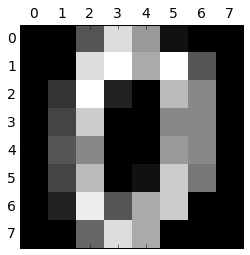

In [61]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
digits = load_digits()
plt.gray() 
plt.matshow(digits.images[0])
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [63]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

//anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


0.50841750841750843

Oops! Let's change some parameters to try to get it to converge. Let's use the default solver (adam), the default activation function (relu), and two hidden layers with 10 nodes each.

In [64]:
clf = MLPClassifier(alpha=0.01, hidden_layer_sizes=(10, 10), # the numbers in the tuple are how many nodes in a layer
                    random_state=0)

In [65]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.80639730639730645

Not bad!

## What are these Convolutional Neural Networks that I keep hearing about?
CNNs are appied to images most often. As such, they require an enormous amount of computational power. Don't try them without a GPU. Just don't. The actual neural network part of CNNs is the same as above. There's just a gazillion preprocessing steps that the images go through before they get to the input layer. More on this later, hopefully...